# **Phase 4**

#### Sama Amr -- 900211296  & Farida Madkour -- 900211360

### As previously suggested by the graphs and the metric measures in the previous phases the Decision Tree shows the best performance accross all; therefore we decided to go further on with the Decision Tree as our Classification Model

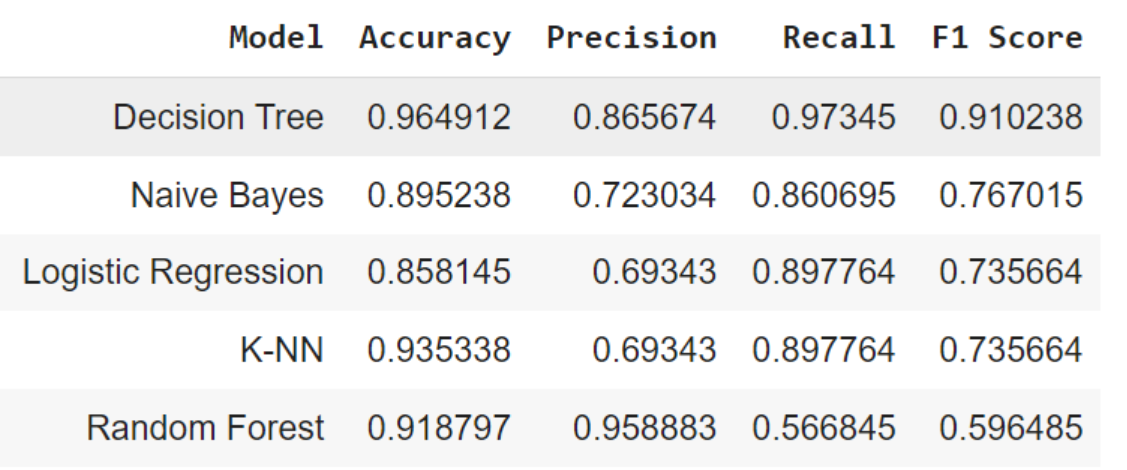



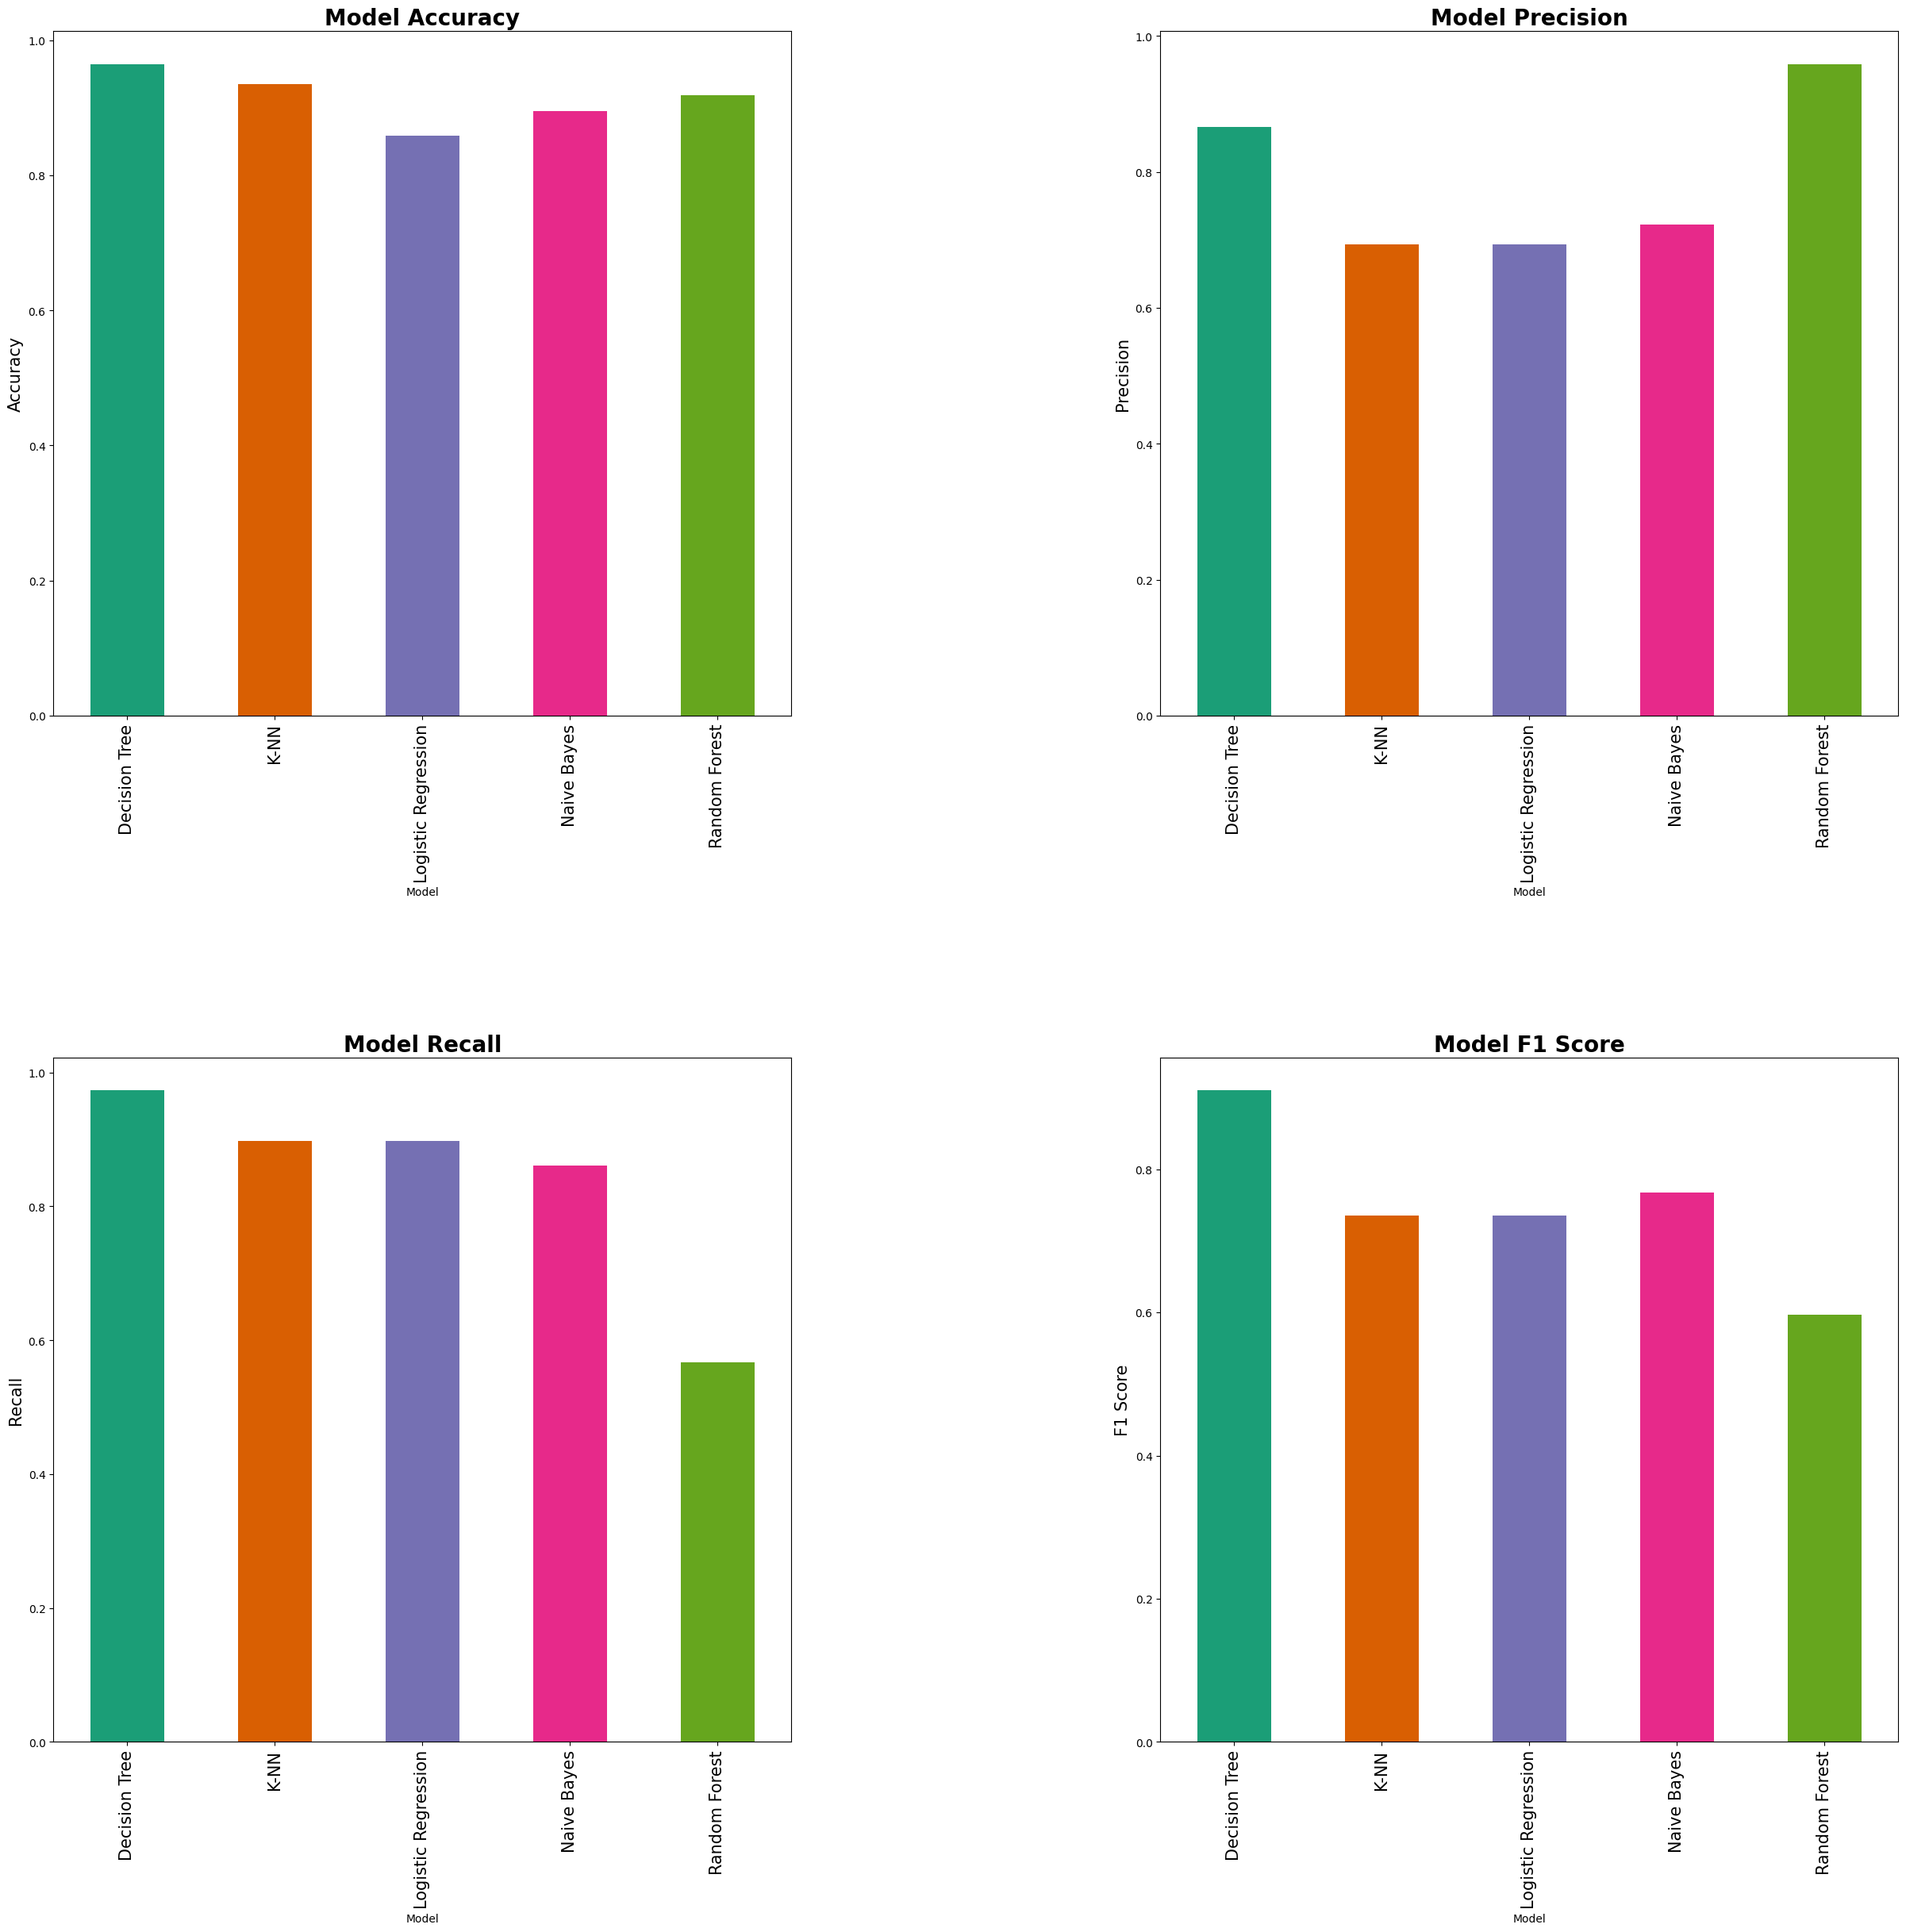

In [ ]:
import warnings
warnings.filterwarnings('ignore')
###

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
df = pd.read_csv("bankloan.csv")
df.head()

###### Data pre-processing

In [ ]:
df.info()
print("--------------------------------")
print("List of Columns:", df.columns)
print("Shape:", df.shape)

Drop ID, experience, and Zip Code columns since they're irrelevant

In [ ]:
df = df.drop(columns=['ID','Experience','ZIP.Code'])
df.head()

Check for missing values

In [ ]:
df.isnull().sum()

Therefore, there is no missing values as specified by the non-null count and the sum calculated

Check for duplicate values and drop them

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

Encodings

Change numeric/continous variables to type float and categorical/discrete variable to type category

In [ ]:
df['Income']=df['Income'].astype('float')
df['Family']=df['Family'].astype('category')
df['Education']=df['Education'].astype('category')
df['CCAvg']=df['CCAvg'].astype('float')
df['Mortgage']=df['Mortgage'].astype('float')
df['Personal.Loan']=df['Personal.Loan'].astype('category')
df['Securities.Account']=df['Securities.Account'].astype('category')
df['CD.Account']=df['CD.Account'].astype('category')
df['Online']=df['Online'].astype('category')
df['CreditCard']=df['CreditCard'].astype('category')
df.info()

Cut the Age and income into Ranges for better interpretations

In [ ]:
#minimum age = 23
#maximum age = 67
bins = [22,30,40,50,60,70]
df['Age_r'] = pd.cut(df['Age'], bins=bins, labels=['23-30', '30-40', '40-50', '50-60','60-70'])

#minimum age = 8
#maximum age = 224
bins = [7,20,100,150,200,250]
df['Income_r'] = pd.cut(df['Income'], bins=bins, labels=['Poor', 'Middle_Class', 'Upper_Class', 'Rich','Very_Rich'])
df.head()

Unique values of each of the variables

In [ ]:
print("Unique Family",pd.unique(df['Family']))
print("------------------------------------------")
print("Unique Education",pd.unique(df['Education']))
print("------------------------------------------")
print("Unique Personal.Loan",pd.unique(df['Personal.Loan']))
print("------------------------------------------")
print("Unique Securities.Account",pd.unique(df['Securities.Account']))
print("------------------------------------------")
print("Unique CD.Account",pd.unique(df['CD.Account']))
print("------------------------------------------")
print("Unique Online",pd.unique(df['Online']))
print("------------------------------------------")
print("Unique CreditCard",pd.unique(df['CreditCard']))

Function to identify outliers

In [ ]:
def outlier(df):

  Q1=df.quantile(0.25)

  Q3=df.quantile(0.75)

  IQR=Q3-Q1

  out = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

  return out

In [ ]:
skewed =['Income','CCAvg','Mortgage']
for col in skewed:
    outliers=outlier(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Outlier numbers are relatively low, yet they could better. In addition their line graphs and histograms are skewed. We found a solution to the problems by:

The best suitable transformation for:
- Income: Cubic root
- CCAvg: Cubic root
- Mortgage: Square root

In [ ]:
df['Income'] = np.cbrt(df['Income'])
df['CCAvg'] = np.cbrt(df['CCAvg'])
df['Mortgage'] = np.sqrt(df['Mortgage'])

Test for outliers after the transformation and plot the histograms

In [ ]:
skewed =['Income','CCAvg','Mortgage']
for col in skewed:
    outliers=outlier(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Outliers are significantly reduced after the transformation

Finally, here's a summary of our continous features

In [ ]:
df.describe()

# Decision Tree Model

In [ ]:
df1 = df.copy()

df1['Income_r'] = pd.factorize(df1['Income_r'])[0] + 1
df1['Age_r'] = pd.factorize(df1['Age_r'])[0] + 1

df1['Income_r'] = df1['Income_r'].astype(int)
df1['Age_r'] = df1['Age_r'].astype(int)


print(df1.dtypes)

df1

Standardize our variable

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df_scaled=df1.copy()
columns = ['Age',	'Income',	'Family',	'CCAvg',	'Education',	'Mortgage',	'Securities.Account',	'CD.Account',	'Online',	'CreditCard']
for col in columns:
    df_scaled[col] = standard_scaler.fit_transform(np.array(df_scaled[col]).reshape(-1,1))

df_scaled.head()

Checking if there are any missing values

In [ ]:
df_scaled.isnull().sum()

Assigning our target and decision variables

In [ ]:
Y = df_scaled['Personal.Loan']
X = df_scaled.drop(['Personal.Loan'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.4, random_state = 42)

In [ ]:
print (" Number of columns in our Features : ", X.shape[1])

###### Solving the Class imbalance problem

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("Before UpSampling, counts of Personal loan = '0': {}".format(sum(y_train==0)))
print("Before UpSampling, counts of Personal loan = '1': {} \n".format(sum(y_train==1)))


print("After UpSampling, counts of Personal loan = '0': {}".format(sum(y_train_upsampled==0)))
print("After UpSampling, counts of Personal loan = '1': {} \n".format(sum(y_train_upsampled==1)))

Initialize a Data Frame to store the Accuracy, Precision, Recall,and F1 score for all our upcoming model

In [ ]:
EVAL_SCORE = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall' ,'F1 Score'])

EVAL_SCORE

###### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import plotly.graph_objects as go

In [ ]:
max_depth_values = range(1, 50)

train_scores = []
test_scores = []

for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_upsampled, y_train_upsampled)

    y_train_pred = clf.predict(X_train_upsampled)
    train_scores.append(accuracy_score(y_train_upsampled, y_train_pred))

    y_test_pred = clf.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_test_pred))

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(max_depth_values), y=train_scores, mode='lines', name='Train Accuracy'))

fig.add_trace(go.Scatter(x=list(max_depth_values), y=test_scores, mode='lines', name='Test Accuracy'))

fig.update_layout(
    title='Max Depth vs. Accuracy',
    xaxis=dict(title='Max Depth'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.7, y=0.9),
)

fig.show()

From this graph we could deduce that after a depth=3 the graph starts to flatten out; therfore, we'd build our decision tree model using a maximum depth=3. That would allow us to overcome overfitting problems

In [ ]:
min_samples_split_values = range(2, 30)

train_scores = []
test_scores = []

for split in min_samples_split_values:
    clf = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    clf.fit(X_train_upsampled, y_train_upsampled)

    y_train_pred = clf.predict(X_train_upsampled)
    train_scores.append(accuracy_score(y_train_upsampled, y_train_pred))

    y_test_pred = clf.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_test_pred))

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(min_samples_split_values), y=train_scores, mode='lines', name='Train Accuracy'))

fig.add_trace(go.Scatter(x=list(min_samples_split_values), y=test_scores, mode='lines', name='Test Accuracy'))

fig.update_layout(
    title='Min Samples Split vs. Accuracy',
    xaxis=dict(title='Min Samples Split'),
    yaxis=dict(title='Accuracy'),
    legend=dict(x=0.7, y=0.9),
)

fig.show()

From the graph above we could conclude that the optimal minimum sample split is =3 where it provides the maximum accuracy

In [ ]:
Decision_Tree = DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=42)

In [ ]:
Decision_Tree.fit(X_train_upsampled, y_train_upsampled)

In [ ]:
y_pred_train = Decision_Tree.predict(X_train_upsampled)
y_pred_test = Decision_Tree.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train_upsampled, y_pred_train)
print(" Decision Tree Training Accuracy :" ,round(train_accuracy,2)*100)

test_accuracy = accuracy_score(y_test, y_pred_test)
print(" Decision Tree Testing Accuracy :" ,round(test_accuracy,2)*100)

Using cross validation on our descision tree and testing the accuracy

In [ ]:
cv_scores_train = cross_val_score(Decision_Tree, X_train_upsampled, y_train_upsampled, cv=5, scoring='accuracy')
print("Cross-Validation Scores on Training Data:  ", cv_scores_train)
print(" Mean Accuracy from Cross-Validation : ", cv_scores_train.mean())

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))

In [ ]:
print("Classification Report : \n" ,classification_report(y_test, y_pred_test))

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

cn=["1","2"]
fn=['Age',	'Income',	'Family',	'CCAvg',	'Education',	'Mortgage',	'Securities.Account',	'CD.Account',	'Online',	'CreditCard','Age_r','Income_r'	]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
plot_tree(Decision_Tree, filled=True,feature_names = fn,class_names=cn)
plt.title("Decision Tree Model")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1_score= metrics.f1_score(y_test, y_pred_test, average='macro')

new=pd.Series({'Model': 'Decision Tree','Accuracy':accuracy,'Precision':precision,'Recall':recall, 'F1 Score': f1_score})
EVAL_SCORE=pd.concat([EVAL_SCORE,new.to_frame().T], ignore_index=True)
EVAL_SCORE

# Model Design (Phase 4)

In [ ]:
class Node:
    def __init__(self,split_feature=None,split_value=None):
        self.split_feature= split_feature
        self.split_value = split_value
        self.label=None
        self.children =[]

class DTree:
    def calc_entropy(self,y):
        m = len(y)
        unique_labels, counts= np.unique(y,return_counts=True)
        entropy = [-1*counts[i]/m* np.log2(counts[i]/m) for i in range(len(unique_labels))]
        total_entropy= np.sum(entropy)

        return total_entropy

    def get_best_feature(self,X,y,features):
        # calc total entropy
        total_entropy= self.calc_entropy(y)

        d= dict()
        # calc gain for each feature
        for feature in features:
            values= np.unique(X[feature])
            mi = 0
            for value in values:
                split_y = y[X[feature] == value]
                mi+= (len(split_y)/len(y)) * self.calc_entropy(split_y)

            d[feature]= total_entropy-mi

        s = dict(sorted(d.items(), key= lambda x: x[1], reverse= True))


        return list(s.keys())[0]




    def train_tree(self,X,y,node,features):
        if len(np.unique(y))==1:
            node.label= np.unique(y)
            return node

        elif X.empty:
            node.label = np.unique(y)[np.argmax(np.unique(y,return_counts=True)[1])]
            return node


        best_feature= self.get_best_feature(X,y,features)
        node.split_feature= best_feature

        values= np.unique(X[best_feature])
        for value in values: #loop every branch
            split_x = X[X[best_feature] == value].drop(best_feature,axis=1)
            split_y = y[X[best_feature] == value]

            new_node= Node()
            new_node.split_value= value
            node.children.append(self.train_tree(split_x, split_y,new_node,split_x.columns))


        return node

    def fit(self,X,y):
        node= Node()
        self.tree= self.train_tree(X,y,node,X.columns)

        return self

    def predict(self,x_test):
        node= self.tree
        while True:
            if len(node.children) == 0:
                return node.label

            for child in node.children:
                if x_test[node.split_feature]== child.split_value:
                    node = child
                    break

    def predict_data(self, X_test):
        predictions = []
        for i in range(len(X_test)):
            x_test = X_test.iloc[i, :]
            node = self.tree
            while True:
                if len(node.children) == 0:
                    predictions.append(node.label)
                    break
                for child in node.children:
                    if x_test[node.split_feature] == child.split_value:
                        node = child
                        break
        return predictions

In [ ]:
clf= DTree()
clf.fit(X_train_upsampled, y_train_upsampled)

x_test= X_train_upsampled.iloc[0,:]
YY=clf.predict_data(X_test)

###### Optimizing the parameters
Testing using the f1 score since it's the most robust

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1')

grid_search.fit(X_train_upsampled, y_train_upsampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_dt_model = grid_search.best_estimator_
test_accuracy = best_dt_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


In [ ]:
Decision_Tree_opt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 2)
Decision_Tree_opt.fit(X_train_upsampled, y_train_upsampled)

In [ ]:
y_pred_train_opt = Decision_Tree_opt.predict(X_train_upsampled)
y_pred_test_opt = Decision_Tree_opt.predict(X_test)
train_accuracy = accuracy_score(y_train_upsampled, y_pred_train_opt)
print(" Decision Tree Training Accuracy :" ,round(train_accuracy,2)*100)

test_accuracy = accuracy_score(y_test, y_pred_test_opt)
print(" Decision Tree Testing Accuracy :" ,round(test_accuracy,2)*100)

In [ ]:
cv_scores_train = cross_val_score(Decision_Tree_opt, X_train_upsampled, y_train_upsampled, cv=5, scoring='f1')
print("Cross-Validation Scores on Training Data:  ", cv_scores_train)
print(" Mean Accuracy from Cross-Validation : ", cv_scores_train.mean())

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test_opt)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))

In [ ]:
print("Classification Report : \n" ,classification_report(y_test, y_pred_test_opt))

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

cn=["1","2"]
fn=['Age',	'Income',	'Family',	'CCAvg',	'Education',	'Mortgage',	'Securities.Account',	'CD.Account',	'Online',	'CreditCard','Age_r','Income_r'	]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
plot_tree(Decision_Tree_opt, filled=True,feature_names = fn,class_names=cn)
plt.title("Decision Tree Model")
plt.show()

In [ ]:
accuracy_opt = accuracy_score(y_test, y_pred_test_opt)
precision_opt = precision_score(y_test, y_pred_test_opt, average='macro')
recall_opt = recall_score(y_test, y_pred_test_opt, average='macro')
f1_score_opt= metrics.f1_score(y_test, y_pred_test_opt, average='macro')

new=pd.Series({'Model': 'Optimized Decision Tree','Accuracy':accuracy_opt,'Precision':precision_opt,'Recall':recall_opt, 'F1 Score': f1_score_opt})
EVAL_SCORE=pd.concat([EVAL_SCORE,new.to_frame().T], ignore_index=True)
EVAL_SCORE

In [ ]:
import pickle

Model = pickle.dumps(Decision_Tree_opt)

In [ ]:
from tkinter import *

window = Tk()
window.rowconfigure(0, weight=1)
window.columnconfigure(0, weight=1)
window.state('zoomed')

page1 = Frame(window)
page2 = Frame(window)
page3 = Frame(window)

for frame in (page1, page2, page3):
    frame.grid(row=0, column=0, sticky='nsew')

def show_frame(frame):
    frame.tkraise()

show_frame(page1)

# ============= Page 1 =========
canvas = Canvas(
    page1,
    bg="#FFFFFF",
    height=982,
    width=1512,
    bd=0,
    highlightthickness=0,
    relief="ridge"
)
canvas.place(x=0, y=0)
canvas.create_rectangle(
    0.0,
    0.0,
    1512.0,
    123.0,
    fill="#8005CC",
    outline=""
)

canvas.create_text(
    32.0,
    42.0,
    anchor="nw",
    text="Loan Approvals ",
    fill="#FFFFFF",
    font=("Junge Regular", 50 * -1)
)

# declaring string variable
# for storing name and password
name_var=StringVar()
passw_var=StringVar()


def submit():

    name=name_var.get()
    password=passw_var.get()

    print("The name is : " + name)
    print("The password is : " + password)

    name_var.set("")
    passw_var.set("")


# creating a label for
# name using widget Label
name_label = Label(page1, text = 'Username', font=('calibre',20),fg="black", bg="white")
name_label.place(x=250,y=160)

# creating a entry for input
# name using widget Entry
name_entry = Entry(page1,textvariable = name_var, font=('calibre',20,'normal'),width= 60)
name_entry.place(x=250,y=200)

# creating a label for password
passw_label = Label(page1, text = 'Password', font = ('calibre',20),fg="black", bg="white")
passw_label.place(x=250,y=310)

# creating a entry for password
passw_entry=Entry(page1, textvariable = passw_var, font = ('calibre',20,'normal'), show = '*',width= 60)
passw_entry.place(x=250,y=350)

button_1 = Button(
    page1,
    text='Login',
    font=("Montserrat Medium", int(20.0)),
    borderwidth=0,
    highlightthickness=0,
    command=lambda: show_frame(page2),
    relief="flat",
    fg='white',
    bg='#8105CC',
    activebackground='#DABCFF'
)
button_1.place(
    x=500.0,
    y=470.0,
    width=327.0,
    height=44.0
)

# ======== Page 2 ===========
canvas = Canvas(
    page2,
    bg="#FFFFFF",
    height=982,
    width=1512,
    bd=0,
    highlightthickness=0,
    relief="ridge"
)
canvas.place(x=0, y=0)
canvas.create_rectangle(
    0.0,
    0.0,
    1512.0,
    123.0,
    fill="#8005CC",
    outline=""
)

canvas.create_text(
    32.0,
    42.0,
    anchor="nw",
    text="Loan Approvals ",
    fill="#FFFFFF",
    font=("Junge Regular", 50 * -1)
)

canvas.create_text(
    400.0,
    89.0,
    anchor="nw",
    text="1 Entry",
    fill="#FFFFFF",
    font=("Junge Regular", 25 * -1)
)

# Define the options for the dropdown menus
options = {
    "Age": ["Select Age", "23-30", "30-40", "40-50", "50-60", "60-70"],
    "Income": ["Select Income", "Poor", "Middle_Class", "Upper_Class", "Rich", "Very_Rich"],
    "Family": ["Select Family", "1", "2", "3", "4"],
    "Education": ["Select Education", "1", "2", "3"],
    "Securities Account": ["Securities Account", "1", "0"],
    "CD Account": ["CD Account", "1", "0"],
    "Online": ["Online", "1", "0"],
    "Credit Card": ["Credit Card", "1", "0"]
}

# Variable to store the selected options
selected_options = {key: StringVar(page2) for key in options.keys()}

# Create the dropdown menus
dropdown_menus = []
for index, (label_text, option_values) in enumerate(options.items(), start=0):
    selected_option = selected_options[label_text]
    selected_option.set(option_values[0])  # Set the default value

    dropdown_menu = OptionMenu(page2, selected_option, *option_values)
    dropdown_menu.config(width=19)
    dropdown_menu.config(height=2)
    dropdown_menu.config(font=("Montserrat Medium", int(14.0)))

    dropdown_menus.append(dropdown_menu)
    if index==0:
        dropdown_menu.place(x=20, y=200)
    if index==1:
        dropdown_menu.place(x=340, y=200)
    if index==2:
        dropdown_menu.place(x=680, y=200)
    if index==3:
        dropdown_menu.place(x=1020, y=200)

    if index==4:
        dropdown_menu.place(x=20, y=340)
    if index==5:
        dropdown_menu.place(x=340, y=340)
    if index==6:
        dropdown_menu.place(x=680, y=340)
    if index==7:
        dropdown_menu.place(x=1020, y=340)


error_label = Label(page2, text="", fg="red", bg="#FFFFFF")
error_label.place(x=550.0, y=550.0)

def add_to_answer():
    return [selected_option.get() for selected_option in selected_options.values()]

def check():
    answer = add_to_answer()
    all_filled = all(value != options[list(options.keys())[index]][0] for index, value in enumerate(answer))
    if all_filled:
        for dropdown_menu in dropdown_menus:
            dropdown_menu.config(bg="white")
        error_label.config(text="")
        #y_pred = Decision_Tree.predict(answer)
        #print(y_pred)
        print(answer)
        show_frame(page3)
    else:
        for index, value in enumerate(answer):
            if value == options[list(options.keys())[index]][0]:
                dropdown_menus[index].config(bg="red")
            else:
                dropdown_menus[index].config(bg="white")
        error_label.config(text="Missing input, try again", fg="red", font=("Montserrat Medium", int(15.0)))


button_2 = Button(
    page2,
    text = 'Decision',
    font=("Montserrat Medium", int(20.0)),
    borderwidth=0,
    highlightthickness=0,
    command=check,
    relief="flat",
    fg='white',
    bg='#8105CC',
    activebackground='#DABCFF'
)
button_2.place(
    x=500.0,
    y=470.0,
    width=327.0,
    height=44.0
)

# ======== Page 3 ===========
canvas = Canvas(
    page3,
    bg="#FFFFFF",
    height=982,
    width=1512,
    bd=0,
    highlightthickness=0,
    relief="ridge"
)
canvas.place(x=0, y=0)
canvas.create_rectangle(
    0.0,
    0.0,
    1512.0,
    123.0,
    fill="#8005CC",
    outline=""
)

canvas.create_text(
    32.0,
    42.0,
    anchor="nw",
    text="Loan Approvals ",
    fill="#FFFFFF",
    font=("Junge Regular", 50 * -1)
)


window.mainloop()